In [1]:
from scipy import misc

s_img = misc.imread("o-chan.png")

In [2]:
type(s_img)

numpy.ndarray

In [3]:
s_img.shape

(360, 630, 4)

In [4]:
s_img.dtype

dtype('uint8')

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [6]:
gray_s_img = np.dot(s_img[...,:3], [0.299, 0.587, 0.114])

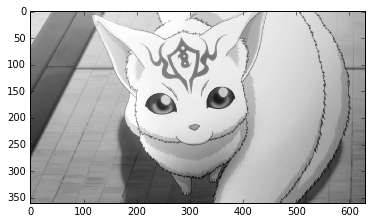

In [7]:
plt.imshow(gray_s_img, cmap=plt.cm.gray)
plt.show()

In [8]:
gray_s_img.shape

(360, 630)

In [9]:
from keras.layers import Input, Dense
from keras.models import Model

input_img = Input(shape=(gray_s_img.shape[0]*gray_s_img.shape[1],))

Using TensorFlow backend.


In [10]:
encoding_dim = 32
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(gray_s_img.shape[0]*gray_s_img.shape[1], activation='sigmoid')(encoded)
autoencoder = Model(input=input_img, output=decoded)

In [11]:
encoder = Model(input=input_img, output=encoded)
encoded_input = Input(shape=(encoding_dim,))#placeholder for encoded input
decoder_layer = autoencoder.layers[-1]#get last layer
decoder = Model(input=encoded_input, output=decoder_layer(encoded_input))#decoder

In [12]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [13]:
x_train = gray_s_img
x_train = x_train.astype('float32')/255.
x_test = x_train.astype('float32')/255.
x_train = x_train.reshape(1, gray_s_img.shape[0]*gray_s_img.shape[1])
x_test = x_test.reshape(1, gray_s_img.shape[0]*gray_s_img.shape[1])
print(x_train.shape)
print(x_test.shape)

(1, 226800)
(1, 226800)


In [14]:
autoencoder.fit(x_train, 
                x_train, 
                nb_epoch=100, 
                batch_size=1,
                shuffle=False, 
                validation_data=(x_test, x_test))

Train on 1 samples, validate on 1 samples
Epoch 1/100
1/1 [==============================] - 0s - loss: 0.6931 - val_loss: 0.6930
Epoch 2/100
1/1 [==============================] - 0s - loss: 0.6931 - val_loss: 0.6930
Epoch 3/100
1/1 [==============================] - 0s - loss: 0.6931 - val_loss: 0.6930
Epoch 4/100
1/1 [==============================] - 0s - loss: 0.6931 - val_loss: 0.6930
Epoch 5/100
1/1 [==============================] - 0s - loss: 0.6931 - val_loss: 0.6930
Epoch 6/100
1/1 [==============================] - 0s - loss: 0.6931 - val_loss: 0.6930
Epoch 7/100
1/1 [==============================] - 0s - loss: 0.6931 - val_loss: 0.6930
Epoch 8/100
1/1 [==============================] - 0s - loss: 0.6931 - val_loss: 0.6930
Epoch 9/100
1/1 [==============================] - 0s - loss: 0.6931 - val_loss: 0.6930
Epoch 10/100
1/1 [==============================] - 0s - loss: 0.6931 - val_loss: 0.6930
Epoch 11/100
1/1 [==============================] - 0s - loss: 0.6930 - val_l

In [15]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

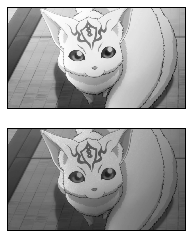

In [16]:
import matplotlib.pyplot as plt
ax = plt.subplot(2, 1, 1)
plt.imshow(x_test[0].reshape(gray_s_img.shape))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

ax = plt.subplot(2, 1, 2)
plt.imshow(decoded_imgs[0].reshape(gray_s_img.shape))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()